In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6,
                 skipfooter=9,
                 engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [4]:
from pandas.tseries.offsets import MonthEnd

In [7]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

KeyError: 'Adjustments'

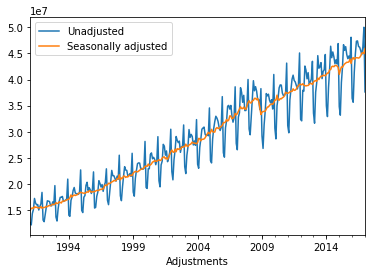

In [8]:
df.plot()

In [9]:
split_date = pd.Timestamp('01-01-2011')

In [10]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

In [29]:
train

,Unadjusted
Adjustments,
1991-01-31,12588862
1991-02-28,12154321
1991-03-31,14337072
1991-04-30,15108570
1991-05-31,17225734
1991-06-30,16342833
1991-07-31,15996243
1991-08-31,16064910
1991-09-30,15015317


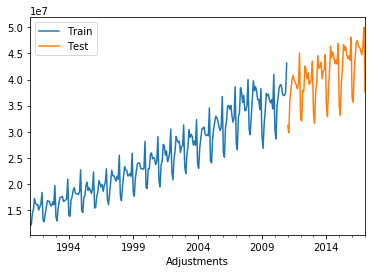

In [11]:
ax = train.plot()
test.plot(ax = ax)
plt.legend(['Train', 'Test'])

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [31]:
train_sc

array([[ 0.01402033],
       [ 0.        ],
       [ 0.0704258 ],
       [ 0.09531795],
       [ 0.16362761],
       [ 0.13514108],
       [ 0.12395846],
       [ 0.12617398],
       [ 0.09230917],
       [ 0.11139526],
       [ 0.13173822],
       [ 0.20091289],
       [ 0.03002688],
       [ 0.01999285],
       [ 0.06596369],
       [ 0.10983126],
       [ 0.14912986],
       [ 0.14718865],
       [ 0.14464787],
       [ 0.11898427],
       [ 0.11802682],
       [ 0.14222108],
       [ 0.12459168],
       [ 0.24290801],
       [ 0.04899091],
       [ 0.02408276],
       [ 0.09865054],
       [ 0.14480155],
       [ 0.17061844],
       [ 0.17067229],
       [ 0.17603636],
       [ 0.1449117 ],
       [ 0.14957943],
       [ 0.15381982],
       [ 0.16036484],
       [ 0.28308682],
       [ 0.05971347],
       [ 0.05306762],
       [ 0.15199345],
       [ 0.17230214],
       [ 0.21246911],
       [ 0.23131079],
       [ 0.1982186 ],
       [ 0.19187716],
       [ 0.19381714],
       [ 0

In [14]:
train_sc[:4]

array([[ 0.01402033],
       [ 0.        ],
       [ 0.0704258 ],
       [ 0.09531795]])

In [16]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [17]:
X_train[:4]

array([[ 0.01402033],
       [ 0.        ],
       [ 0.0704258 ],
       [ 0.09531795]])

In [18]:
a = np.array([1,2,3])

In [19]:
a[:-1]

array([1, 2])

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [23]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [24]:
es = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [26]:
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[es])

Epoch 1/200
239/239 [==============================] - 2s - loss: 0.0548     
Epoch 2/200
239/239 [==============================] - 0s - loss: 0.0165     
Epoch 3/200
239/239 [==============================] - 0s - loss: 0.0140     
Epoch 4/200
239/239 [==============================] - 0s - loss: 0.0123     
Epoch 5/200
239/239 [==============================] - 0s - loss: 0.0112     
Epoch 6/200
239/239 [==============================] - 0s - loss: 0.0108     
Epoch 7/200
239/239 [==============================] - 0s - loss: 0.0104     
Epoch 8/200
239/239 [==============================] - 0s - loss: 0.0103     
Epoch 9/200
239/239 [==============================] - 0s - loss: 0.0102     
Epoch 10/200
239/239 [==============================] - 0s - loss: 0.0100     
Epoch 11/200
239/239 [==============================] - 0s - loss: 0.0102     
Epoch 12/200
239/239 [==============================] - 0s - loss: 0.0101     
Epoch 00011: early stopping


In [27]:
y_pred = model.predict(X_test)

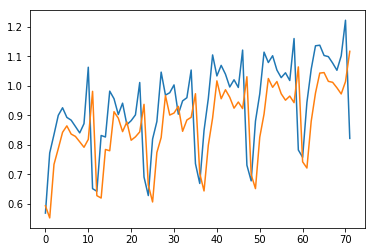

In [28]:
plt.plot(y_test)
plt.plot(y_pred)

It is visible that the model did not learn to predict the values. It learned to repeat the input thought. (The input is the value at t-1 and we expect to give use the value at t. However, the model is just repeating the value at t-1)

In [32]:
from keras.layers import LSTM

In [33]:
X_train.shape

(239, 1)

In [34]:
X_train[:, None].shape

(239, 1, 1)

In [39]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]


In [40]:
K.clear_session()
model = Sequential()
model.add(LSTM(6, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[es])

Epoch 1/100
239/239 [==============================] - 1s - loss: 0.1484     
Epoch 2/100
239/239 [==============================] - 1s - loss: 0.0494     
Epoch 3/100
239/239 [==============================] - 1s - loss: 0.0383     
Epoch 4/100
239/239 [==============================] - 1s - loss: 0.0321     
Epoch 5/100
239/239 [==============================] - 1s - loss: 0.0264     
Epoch 6/100
239/239 [==============================] - 1s - loss: 0.0210     
Epoch 7/100
239/239 [==============================] - 1s - loss: 0.0167     
Epoch 8/100
239/239 [==============================] - 1s - loss: 0.0136     
Epoch 9/100
239/239 [==============================] - 1s - loss: 0.0116     
Epoch 10/100
239/239 [==============================] - 1s - loss: 0.0109     
Epoch 11/100
239/239 [==============================] - 1s - loss: 0.0104     
Epoch 12/100
239/239 [==============================] - 1s - loss: 0.0102     
Epoch 13/100
239/239 [==============================] - 1s - 

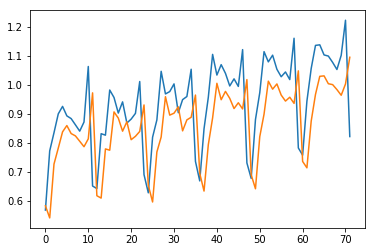

In [42]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

The mode is still not producing good results as the prediction is shifted from the real values. We will use a window approach where we consider multiple past values to detect the future one.

============= WINDOWS ========================

In [43]:
train_sc.shape

(240, 1)

In [44]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [45]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [50]:
test_sc_df.head()

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
2011-01-31,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-30,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-31,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
X_train = train_sc_df.dropna().drop('Scaled', axis = 1)
y_train = train_sc_df.dropna()[['Scaled']]

In [51]:
X_test = test_sc_df.dropna().drop('Scaled', axis = 1)
y_test = test_sc_df.dropna()[['Scaled']]

In [47]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [49]:
X_train.shape

(228, 12)

In [52]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [53]:
y_test.shape

(61, 1)

In [54]:
X_test.shape

(61, 12)

In [55]:
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[es]) 

Epoch 1/200
228/228 [==============================] - 0s - loss: 0.0100     
Epoch 2/200
228/228 [==============================] - 0s - loss: 0.0077     
Epoch 3/200
228/228 [==============================] - 0s - loss: 0.0054     
Epoch 4/200
228/228 [==============================] - 0s - loss: 0.0044     
Epoch 5/200
228/228 [==============================] - 0s - loss: 0.0032     
Epoch 6/200
228/228 [==============================] - 0s - loss: 0.0030     
Epoch 7/200
228/228 [==============================] - 0s - loss: 0.0028     
Epoch 8/200
228/228 [==============================] - 0s - loss: 0.0019     
Epoch 9/200
228/228 [==============================] - 0s - loss: 0.0018     
Epoch 10/200
228/228 [==============================] - 0s - loss: 0.0016     
Epoch 11/200
228/228 [==============================] - 0s - loss: 0.0016     
Epoch 12/200
228/228 [==============================] - 0s - loss: 0.0014     
Epoch 13/200
228/228 [==============================] - 0s - 

In [57]:
y_pred = model.predict(X_test)

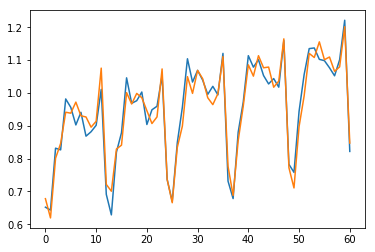

In [58]:
plt.plot(y_test)
plt.plot(y_pred)

In [59]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)


In [61]:
K.clear_session()
model = Sequential()
model.add(LSTM(6, input_shape=(1, 12)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_t, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[es]) 

Epoch 1/200
228/228 [==============================] - 1s - loss: 0.1134     
Epoch 2/200
228/228 [==============================] - 1s - loss: 0.0125     
Epoch 3/200
228/228 [==============================] - 1s - loss: 0.0095     
Epoch 4/200
228/228 [==============================] - 0s - loss: 0.0084     
Epoch 5/200
228/228 [==============================] - 1s - loss: 0.0076     
Epoch 6/200
228/228 [==============================] - 1s - loss: 0.0069     
Epoch 7/200
228/228 [==============================] - 1s - loss: 0.0067     
Epoch 8/200
228/228 [==============================] - 1s - loss: 0.0059     
Epoch 9/200
228/228 [==============================] - 1s - loss: 0.0058     
Epoch 10/200
228/228 [==============================] - 0s - loss: 0.0054     
Epoch 11/200
228/228 [==============================] - 1s - loss: 0.0049     
Epoch 12/200
228/228 [==============================] - 1s - loss: 0.0043     
Epoch 13/200
228/228 [==============================] - 0s - 

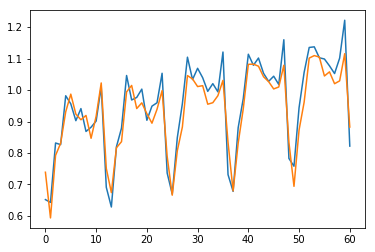

In [62]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)